In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [19]:
import datafunc; reload(datafunc)
from datafunc import *

In [3]:
df = pd.read_csv('all_dailies.csv')

In [4]:
df['type'] = df['close'].apply(type)

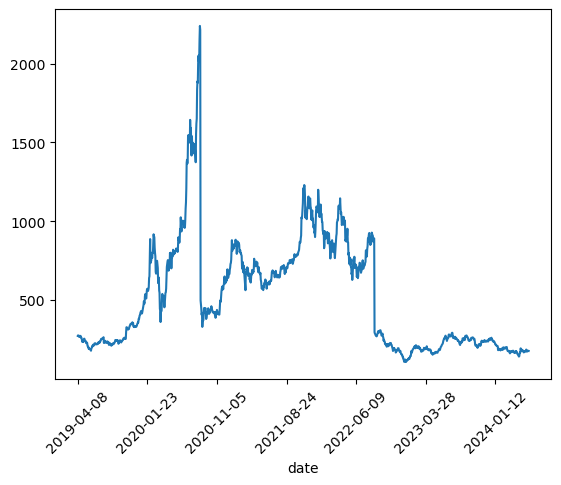

In [6]:
plot(df, 'tsla')

In [16]:
df = df.drop_duplicates(subset=['ticker', 'date'])

In [7]:
df['value'] = df['close'] * df['volume']

In [8]:
year = df[df['date'] > '2023-05-29']
goog = year[year.ticker=='GOOG']

In [12]:
latest = df[df['date'] == df['date'].max()].copy()
latest.sort_values('value', ascending=False, inplace=True)

order = latest['ticker'].tolist()
rankdict = dict(zip(order, list(range(len(order)))))
df['rank'] = df['ticker'].apply(lambda x: ranking(x, rankdict))

In [21]:
top = df[df['rank'] <= 3000].copy()

In [22]:
df['return'] = df['close'].groupby(df['ticker']).transform(lambda x: x.pct_change())
df['cumret'] = df.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [30]:
recent = df[df['date'] >= '2022-01-01'].copy()

In [31]:
recent['ret'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.pct_change())
recent['cumret'] = recent.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [32]:
ranked = recent[recent['rank'] < 3000]

In [33]:
sds = ranked.groupby('ticker')['ret'].std()
crs = ranked.groupby('ticker')['cumret'].last()

In [34]:
lower = 0.85
upper = 1.25
between = [t for t, v in crs.items() if lower < v < upper]

In [35]:
stables = recent[recent['ticker'].isin(between)]

In [36]:
between_sds = {key : value for key, value in sds.items() if key in between}
bs_sorted = sorted(between_sds.items(), key=lambda item:item[1], reverse=True)

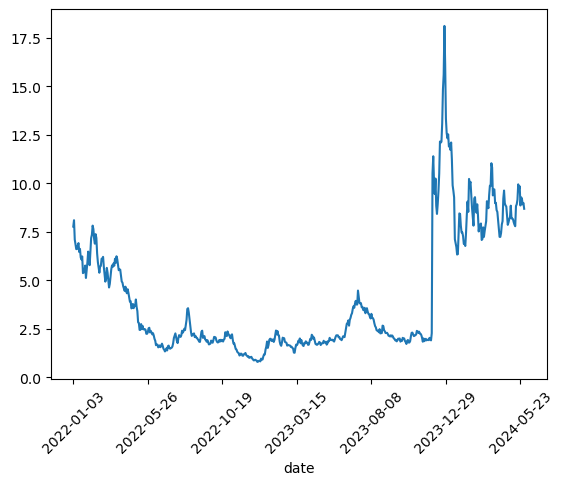

In [42]:
plot(recent, 'hut')

In [43]:
bs_sorted[:10]

[('MULN', 7.263279135572302),
 ('GDXD', 0.3635670130315188),
 ('CGC', 0.3479628689424749),
 ('NVDS', 0.26394669609148214),
 ('HUT', 0.1623505323023446),
 ('OKLO', 0.1251286981104745),
 ('DJTWW', 0.11407976707533064),
 ('EYPT', 0.09565268041412511),
 ('APLD', 0.09055593336855054),
 ('IBRX', 0.08035392828896802)]

In [44]:
recent['ma2'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.rolling(2).mean())

In [53]:
recent['ma5'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.rolling(5).mean())

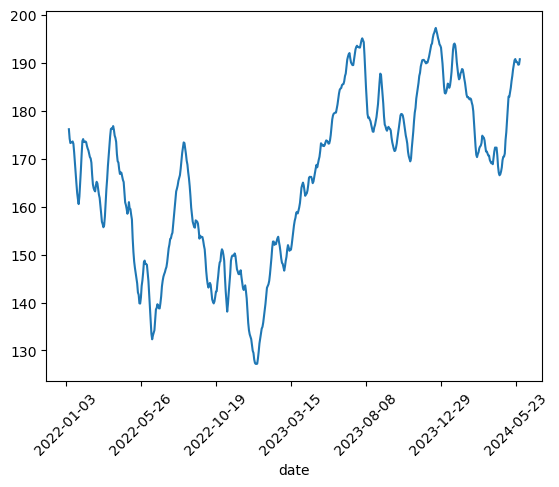

In [54]:
plot(recent, 'aapl', 'ma5')

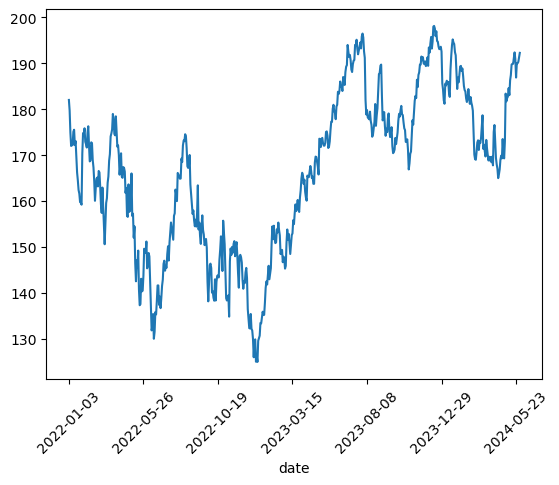

In [52]:
plot(recent, 'aapl')